Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Collecting the data

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\avocado.csv\avocado.csv")

Exploratory Data Analysis (Non-Graphical)

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#Checking the types of values in column type
data['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [30]:
reg = data['region'].unique()
print('Total number of values in the column region are:',len(reg))
print('\n',reg)

Total number of values in the column region are: 54

 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The dataset is clean and does not contain any null values.

In [9]:
# Printing the statistical dustribution of the dataset
pd.options.display.float_format = '{:.0f}'.format
print(data.describe())

       Unnamed: 0  AveragePrice  Total Volume     4046     4225    4770  \
count       18249         18249         18249    18249    18249   18249   
mean           24             1        850644   293008   295155   22840   
std            15             0       3453545  1264989  1204120  107464   
min             0             0            85        0        0       0   
25%            10             1         10839      854     3009       0   
50%            24             1        107377     8645    29061     185   
75%            38             2        432962   111020   150207    6243   
max            52             3      62505647 22743616 20470573 2546439   

       Total Bags  Small Bags  Large Bags  XLarge Bags  year  
count       18249       18249       18249        18249 18249  
mean       239639      182195       54338         3106  2016  
std        986242      746179      243966        17693     1  
min             0           0           0            0  2015  
25%      

Exploratory Data Analysis (Graphical)

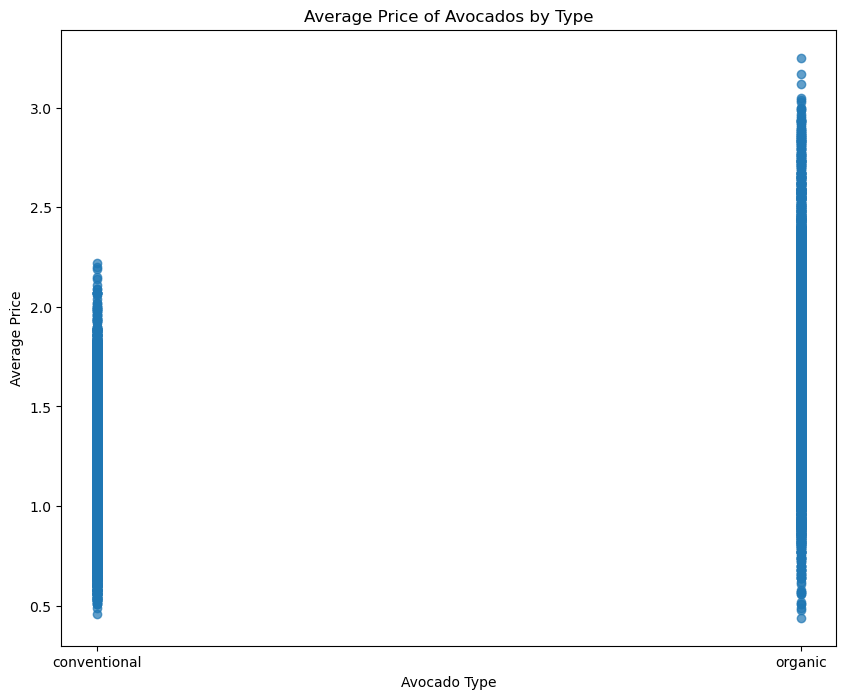

In [14]:
# Plotting average price vs type graph
plt.figure(figsize=(10,8))
plt.scatter(data['type'],data['AveragePrice'],alpha=0.7)
plt.xlabel('Avocado Type')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados by Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

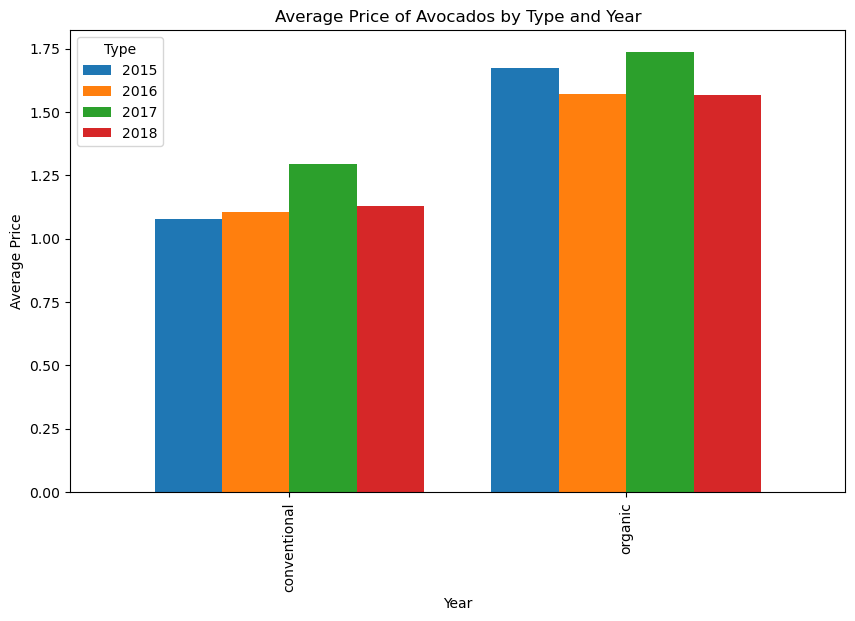

In [34]:
avg_price = data.groupby(['type','year'])['AveragePrice'].mean().unstack()
plt.figure(figsize=(10,6))
avg_price.plot(kind='bar',figsize=(10,6),width=0.8)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados by Type and Year')
plt.legend(title='Type')
plt.show()

<Figure size 1400x800 with 0 Axes>

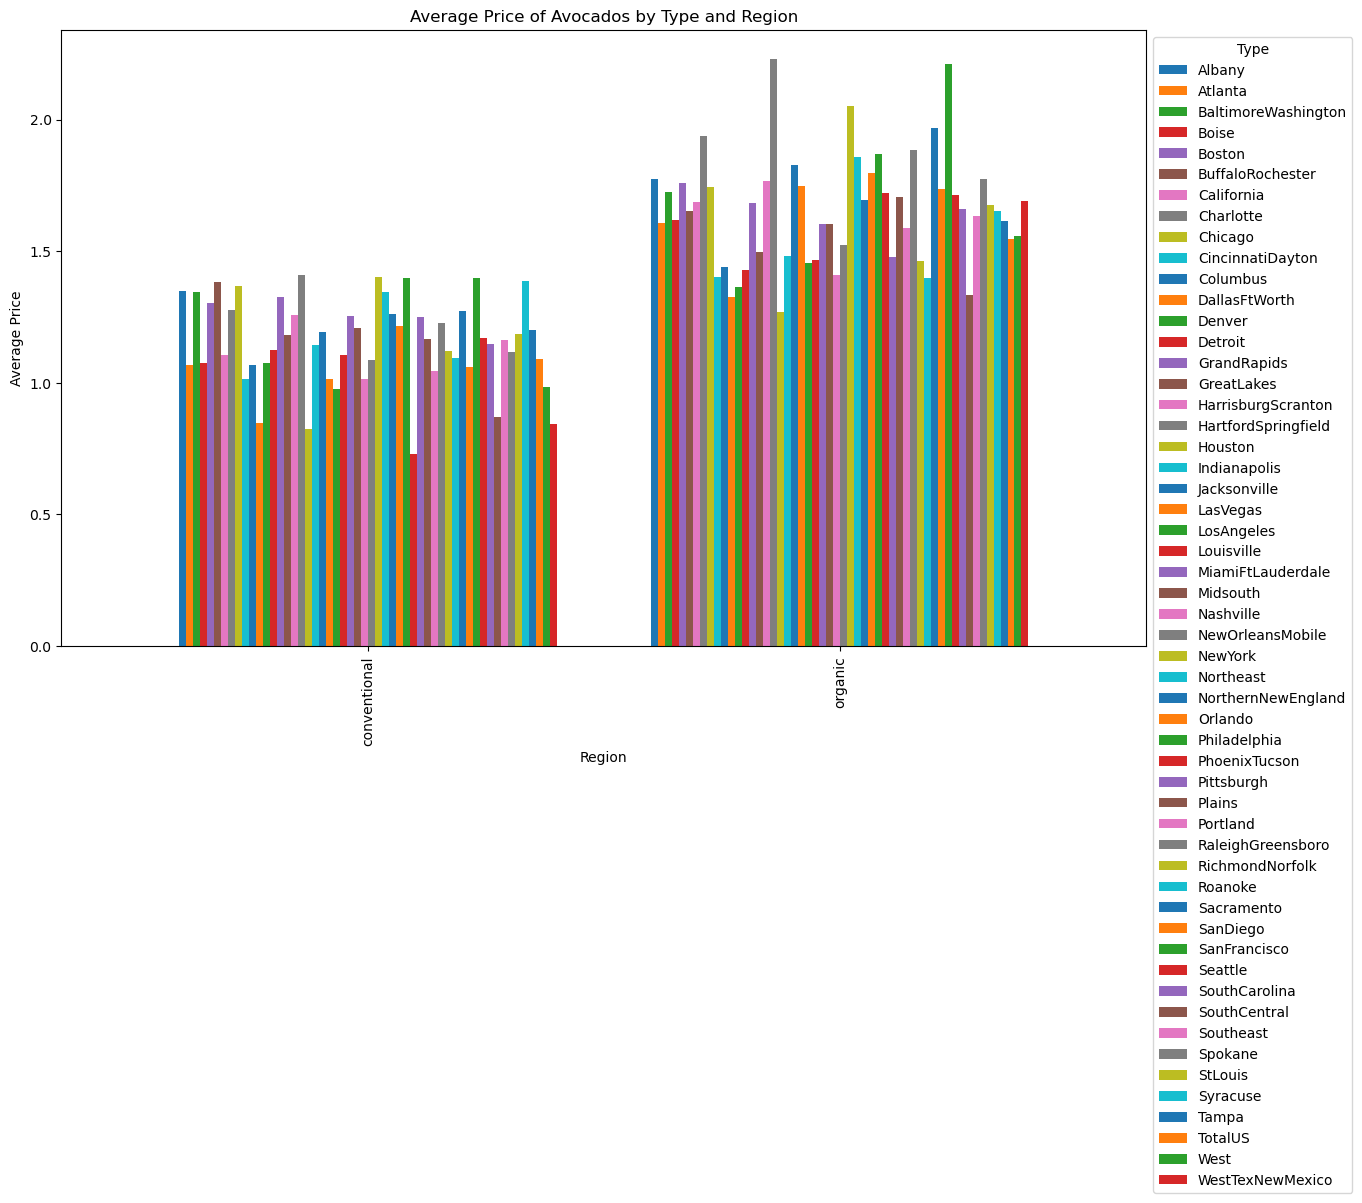

In [19]:
avg_price_reg = data.groupby(['type','region'])['AveragePrice'].mean().unstack()
plt.figure(figsize=(14,8))
avg_price_reg.plot(kind='bar',figsize=(14,8),width=0.8)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados by Type and Region')
plt.legend(title='Type',bbox_to_anchor=(1,1))
plt.show()

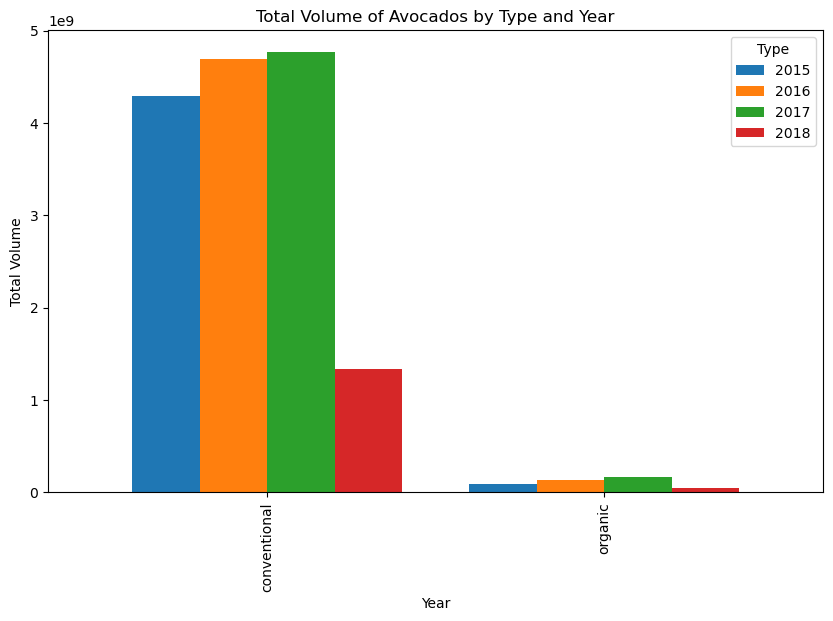

In [31]:
total_vol = data.groupby(['type','year'])['Total Volume'].sum().unstack()
total_vol.plot(kind='bar',figsize=(10,6),width=0.8)
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocados by Type and Year')
plt.legend(title='Type')
plt.show()

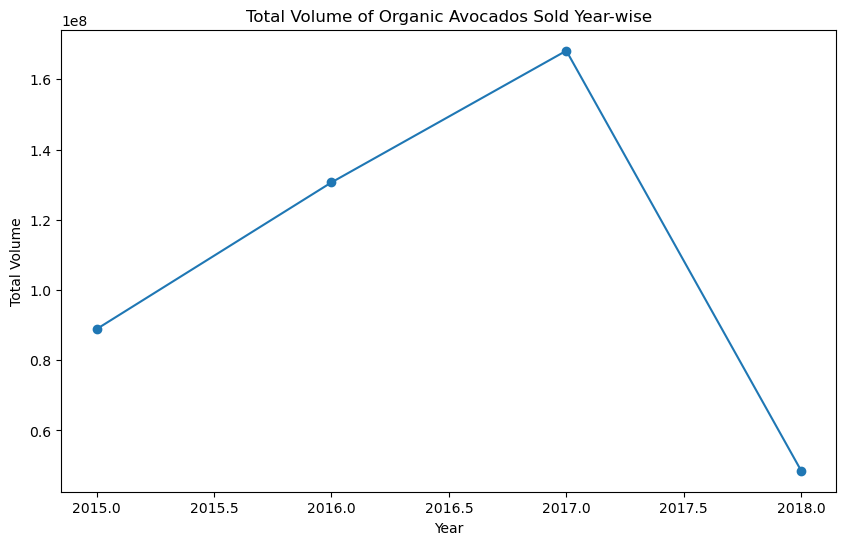

In [37]:
org_data = data[data['type'] == 'organic']
org_vol = org_data.groupby('year')['Total Volume'].sum()
plt.figure(figsize=(10,6))
plt.plot(org_vol.index,org_vol.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Volume of Organic Avocados Sold Year-wise')
plt.show()

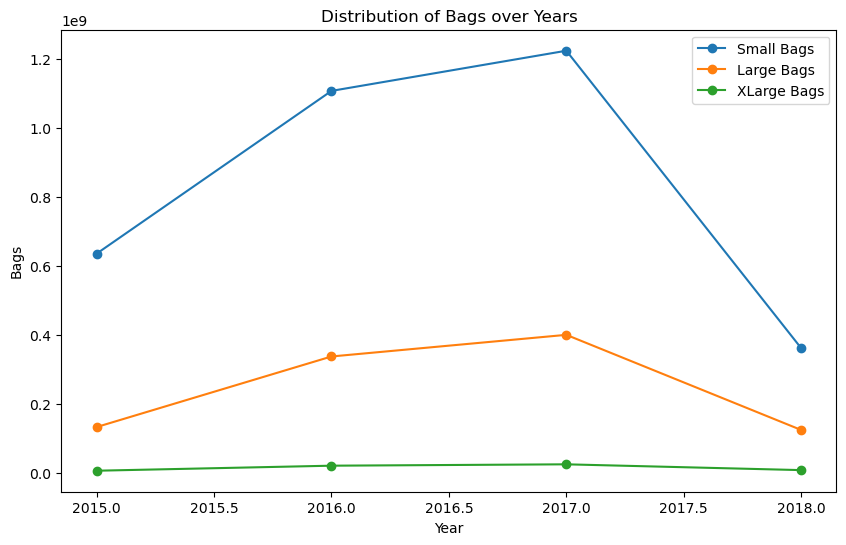

In [40]:
bag_p_year = data.groupby('year')[['Small Bags','Large Bags','XLarge Bags']].sum()
plt.figure(figsize=(10,6))
plt.plot(bag_p_year.index,bag_p_year['Small Bags'],marker='o',label='Small Bags')
plt.plot(bag_p_year.index,bag_p_year['Large Bags'],marker='o',label='Large Bags')
plt.plot(bag_p_year.index,bag_p_year['XLarge Bags'],marker='o',label='XLarge Bags')
plt.xlabel('Year')
plt.ylabel('Bags')
plt.title('Distribution of Bags over Years')
plt.legend()
plt.show()

In [47]:
features = data.iloc[:,2:11]
features.skew()

AveragePrice    1
Total Volume    9
4046            9
4225            9
4770           10
Total Bags     10
Small Bags     10
Large Bags     10
XLarge Bags    13
dtype: float64

In [54]:
# Treating skewness in the features using Box-Cox transfomation 
from scipy import stats
from scipy.stats import boxcox
selected_features = data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
transformed_features = pd.DataFrame()

for column in selected_features.columns:
    transformed_feature, _ = boxcox(selected_features[column] + 1) 
    transformed_features[column] = transformed_feature

print('Transformed Features:')
print(transformed_features.head())

Transformed Features:
   AveragePrice  Total Volume  4046  4225  4770  Total Bags  Small Bags  \
0             1            10     8    16     4          11          13   
1             1            10     7    15     4          11          13   
2             1            11     8    17     5          10          13   
3             1            10     8    16     4          10          12   
4             1            10     8    15     4          10          12   

   Large Bags  XLarge Bags  
0           5            0  
1           5            0  
2           6            0  
3           6            0  
4           6            0  


In [56]:
data = pd.concat([data,transformed_features],axis=1)
print("Dataset with transformed Features:")
print(data.head())

Dataset with transformed Features:
   Unnamed: 0        Date AveragePrice  Total Volume 4046   4225  4770  \
0           0  2015-12-27            1         64237 1037  54455    48   
1           1  2015-12-20            1         54877  674  44639    58   
2           2  2015-12-13            1        118220  795 109150   130   
3           3  2015-12-06            1         78992 1132  71976    73   
4           4  2015-11-29            1         51040  941  43838    76   

   Total Bags  Small Bags  Large Bags  ...  region AveragePrice  Total Volume  \
0        8697        8604          93  ...  Albany            1            10   
1        9506        9408          97  ...  Albany            1            10   
2        8145        8042         103  ...  Albany            1            11   
3        5811        5677         134  ...  Albany            1            10   
4        6184        5986         198  ...  Albany            1            10   

  4046  4225  4770  Total Bags  S

In [58]:
transformed_features.skew()

AveragePrice    0
Total Volume    0
4046           -0
4225           -0
4770            0
Total Bags     -0
Small Bags      0
Large Bags     -0
XLarge Bags     1
dtype: float64

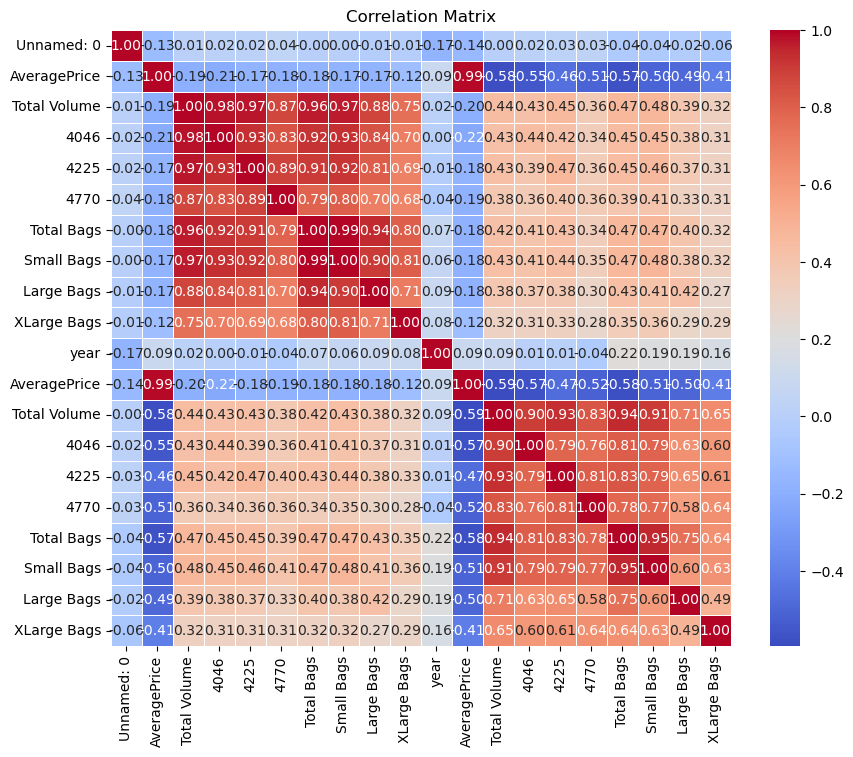

In [64]:
# Creating a correlation matrix
numeric_data = data.select_dtypes(include=['int','float'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Creating Models 

First i will be creating a classification model to predict the region and after that i will create a regression model to predict average price 

Random Forest Classifier 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [66]:
# Converting categorical variable 'type' to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

In [69]:
# Splitting the data into test and train 
x_class = data.drop(['region','Unnamed: 0','Date'],axis=1)
y_class = data['region']
x_train,x_test,y_train,y_test = train_test_split(x_class,y_class,test_size=0.2,random_state=100)

In [71]:
model = RandomForestClassifier(n_estimators = 100, random_state=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
classification_accuracy = accuracy_score(y_test,y_pred)
print('Classification Accuracy:', classification_accuracy)

Classification Accuracy: 0.9035616438356164


Creating a Regression Model


Random Forest Regressor

In [75]:
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

In [76]:
x_reg = data.drop(['AveragePrice','Unnamed: 0','Date'],axis=1)
y_reg = data['AveragePrice']
x_train,x_test,y_train,y_test = train_test_split(x_reg,y_reg,test_size=0.2,random_state = 100)

In [77]:
model = RandomForestRegressor(n_estimators=100,random_state=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
regression_mse = mean_squared_error(y_test,y_pred)
print("Regression Mean Squared Error:", regression_mse)

Regression Mean Squared Error: 0.013748896129084113


Conclusion :- 

Classification Model:

The classification model achieved an accuracy of approximately 90.36%. This means that the model correctly classified around 90.36% of the observations into their respective regions based on the features provided. Accuracy is a measure of the proportion of correctly classified instances out of all instances, and higher accuracy values indicate better performance. In this case, the high accuracy suggests that the classification model is effective in predicting the regions of avocados based on the provided features.


Regression Model:

The regression model achieved a mean squared error (MSE) of approximately 0.0137. This indicates that, on average, the squared difference between the predicted and actual average prices of avocados is around 0.0137. Since MSE measures the average squared deviation of predicted values from the true values, lower values of MSE indicate better performance. In this case, the relatively low MSE suggests that the regression model is performing well in predicting average prices.